# EDA Chicago Food Inspections dataset

## 1. Exploratory data analysis and metric selection

### 1a. Look at, summarize, and clean the data


This dataset has is from [Chicago Department of Public Health’s Food Protection Program](https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5) public data from 2010-2021. This data is daily updated. It has over 200K valid data point and 17 features. All the features will be used for this project.

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline

sns.set(context='notebook', style='whitegrid')

In [2]:
food_data_prelim = pd.read_csv('data/Food_Inspections.csv')

In [3]:
food_data_prelim.tail()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
223355,114398,AMERICAN MEDICAL ASSOCIATION,AMERICAN MEDICAL ASSOCIATION,21129.0,Restaurant,Risk 1 (High),515 N STATE ST,CHICAGO,IL,60654.0,04/05/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.891418,-87.627915,"(-87.62791475607904, 41.89141810118847)"
223356,150294,DUNKIN DONUTS,DUNKIN DONUTS,1516830.0,Restaurant,Risk 2 (Medium),3843 N CICERO AVE,CHICAGO,IL,60641.0,03/24/2010,Short Form Complaint,Pass,NaN,41.951065,-87.747103,"(-87.74710290506961, 41.95106520855843)"
223357,88257,AWAMI BAZAAR & ZABIHA MEAT,AWAMI BAZAAR & ZABIHA MEAT,68226.0,Grocery Store,Risk 2 (Medium),2340 W DEVON AVE,CHICAGO,IL,60659.0,02/17/2010,Consultation,Pass,NaN,41.997854,-87.689064,"(-87.68906426569195, 41.99785368943807)"
223358,238247,COMMUNITY MEAT & PRODUCE,NaN,2027511.0,Grocery Store,Risk 2 (Medium),457 E 79th ST,CHICAGO,IL,60619.0,04/13/2010,License,Pass,NaN,41.751047,-87.612643,"(-87.61264331123509, 41.7510468251433)"
223359,176527,North-Grand H.S.,NORTH - GRAND HIGH SCHOOL,46431.0,School,Risk 1 (High),4338 W Wabansia,CHICAGO,IL,60639.0,03/08/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.911701,-87.735252,"(-87.73525151472917, 41.911700944024766)"


In [4]:
# Rename columns
food_data_prelim.rename(columns = {'DBA Name': 'Doing Business As', 'AKA Name': 'Also Known As'}, inplace= True)

In [5]:
# Remove columns I don't need City and State
food_data_prelim.drop(['Also Known As', 'Address', 'City', 'State', 'Latitude', 'Longitude'], axis = 1, inplace=True)

In [6]:
# Look for all Null and Nan
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223360 entries, 0 to 223359
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Inspection ID      223360 non-null  int64  
 1   Doing Business As  223358 non-null  object 
 2   License #          223343 non-null  float64
 3   Facility Type      218426 non-null  object 
 4   Risk               223289 non-null  object 
 5   Zip                223307 non-null  float64
 6   Inspection Date    223360 non-null  object 
 7   Inspection Type    223359 non-null  object 
 8   Results            223360 non-null  object 
 9   Violations         163531 non-null  object 
 10  Location           222599 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 18.7+ MB


In [7]:
# Replace Nan in Violation by None
food_data_prelim['Violations'] = food_data_prelim['Violations'].fillna('None')
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223360 entries, 0 to 223359
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Inspection ID      223360 non-null  int64  
 1   Doing Business As  223358 non-null  object 
 2   License #          223343 non-null  float64
 3   Facility Type      218426 non-null  object 
 4   Risk               223289 non-null  object 
 5   Zip                223307 non-null  float64
 6   Inspection Date    223360 non-null  object 
 7   Inspection Type    223359 non-null  object 
 8   Results            223360 non-null  object 
 9   Violations         223360 non-null  object 
 10  Location           222599 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 18.7+ MB


In [8]:
# Check missing values
food_data_prelim.isnull().sum().sort_values(ascending = False)

Facility Type        4934
Location              761
Risk                   71
Zip                    53
License #              17
Doing Business As       2
Inspection Type         1
Violations              0
Results                 0
Inspection Date         0
Inspection ID           0
dtype: int64

In [9]:
food_data_prelim['Facility Type'] = food_data_prelim['Facility Type'].fillna('Other')
food_data_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223360 entries, 0 to 223359
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Inspection ID      223360 non-null  int64  
 1   Doing Business As  223358 non-null  object 
 2   License #          223343 non-null  float64
 3   Facility Type      223360 non-null  object 
 4   Risk               223289 non-null  object 
 5   Zip                223307 non-null  float64
 6   Inspection Date    223360 non-null  object 
 7   Inspection Type    223359 non-null  object 
 8   Results            223360 non-null  object 
 9   Violations         223360 non-null  object 
 10  Location           222599 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 18.7+ MB


In [10]:
food_data_prelim.isnull().sum().sort_values(ascending = False)

Location             761
Risk                  71
Zip                   53
License #             17
Doing Business As      2
Inspection Type        1
Violations             0
Results                0
Inspection Date        0
Facility Type          0
Inspection ID          0
dtype: int64

In [11]:
food_data = food_data_prelim.dropna()
food_data.isnull().sum().sort_values(ascending = False)

Location             0
Violations           0
Results              0
Inspection Type      0
Inspection Date      0
Zip                  0
Risk                 0
Facility Type        0
License #            0
Doing Business As    0
Inspection ID        0
dtype: int64

In [12]:
# Count the number if Null in Results
count = food_data['Results'].count()
print(count)

222461


In [13]:
# move Impection Date type from object to date
'''from dateutil import parser
parser.parse('04/05/2010')'''

"from dateutil import parser\nparser.parse('04/05/2010')"

In [14]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222461 entries, 0 to 223359
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Inspection ID      222461 non-null  int64  
 1   Doing Business As  222461 non-null  object 
 2   License #          222461 non-null  float64
 3   Facility Type      222461 non-null  object 
 4   Risk               222461 non-null  object 
 5   Zip                222461 non-null  float64
 6   Inspection Date    222461 non-null  object 
 7   Inspection Type    222461 non-null  object 
 8   Results            222461 non-null  object 
 9   Violations         222461 non-null  object 
 10  Location           222461 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 20.4+ MB


In [15]:
# Save to .csv
food_data.to_csv('data/clean_food_data.csv')

### 1b. Scope out classification viability

In [16]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Logistic regression visualization utility function
def generate_logreg_vis(beta=-.05):
    
    # draw feature values and use beta to calculate predicted probability
    # of positive class for each feature value
    x = np.random.uniform(low=-1, high=1, size=150) * 100
    p = 1 / (1 + np.exp(-(beta*x))) # logistic regression function
    
    # plot predicted probs against the feature 
    plt.scatter(x, p)
    plt.title('Probability of Default vs. Credit Rating Score')
    plt.ylabel('Predicted Probability of Default')
    plt.xlabel('Credit Rating Score')
    
    # 50% probability threshold
    plt.gca().axhline(.5,c='k',ls='--',lw=1)

In [17]:
# Load my clean data
food = pd.read_csv('data/clean_food_Data.csv')
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222461 entries, 0 to 222460
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         222461 non-null  int64  
 1   Inspection ID      222461 non-null  int64  
 2   Doing Business As  222461 non-null  object 
 3   License #          222461 non-null  float64
 4   Facility Type      222461 non-null  object 
 5   Risk               222461 non-null  object 
 6   Zip                222461 non-null  float64
 7   Inspection Date    222461 non-null  object 
 8   Inspection Type    222461 non-null  object 
 9   Results            222461 non-null  object 
 10  Violations         222461 non-null  object 
 11  Location           222461 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 20.4+ MB


In [18]:
food.describe()

,Unnamed: 0,Inspection ID,License #,Zip
count,222461.000000,2.224610e+05,2.224610e+05,222461.000000
mean,111680.089692,1.564965e+06,1.646130e+06,60629.350187
std,64462.046639,6.743260e+05,9.050493e+05,19.185747
min,0.000000,4.424700e+04,0.000000e+00,60148.000000
25%,55861.000000,1.202415e+06,1.272529e+06,60614.000000
50%,111689.000000,1.559744e+06,2.004104e+06,60625.000000
75%,167483.000000,2.150726e+06,2.293041e+06,60643.000000
max,223359.000000,2.523234e+06,9.999999e+06,60827.000000


In [19]:
food.head()

,Unnamed: 0,Inspection ID,Doing Business As,License #,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Violations,Location
0,0,124275,KINGS NO. 2 DRIVE-IN,3638.0,Restaurant,Risk 1 (High),60630.0,01/15/2010,Out of Business,Pass,None,"(-87.76738848299047, 41.97547236947101)"
1,1,114270,Au Bon Pain,1980011.0,Restaurant,Risk 1 (High),60654.0,01/11/2010,Suspected Food Poisoning,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,"(-87.63495520292739, 41.8880742810662)"
2,2,164299,AAA GROCERY STORE,1926714.0,Grocery Store,Risk 3 (Low),60643.0,01/27/2010,Complaint Re-Inspection,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,"(-87.64662641289908, 41.706991857937496)"
3,3,98323,LO'S CHINESE KITCHEN,42194.0,Restaurant,Risk 1 (High),60618.0,01/07/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,"(-87.69830277007019, 41.954083317714684)"
4,4,67852,SU TAQUERIA EL GALLO BRAVO #4,1766968.0,Restaurant,Risk 1 (High),60639.0,01/12/2010,Complaint Re-Inspection,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.76773430251839, 41.91922446447527)"


In [20]:
food.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [21]:
food.tail()

,Inspection ID,Doing Business As,License #,Facility Type,Risk,Zip,Inspection Date,Inspection Type,Results,Violations,Location
222456,114398,AMERICAN MEDICAL ASSOCIATION,21129.0,Restaurant,Risk 1 (High),60654.0,04/05/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,"(-87.62791475607904, 41.89141810118847)"
222457,150294,DUNKIN DONUTS,1516830.0,Restaurant,Risk 2 (Medium),60641.0,03/24/2010,Short Form Complaint,Pass,None,"(-87.74710290506961, 41.95106520855843)"
222458,88257,AWAMI BAZAAR & ZABIHA MEAT,68226.0,Grocery Store,Risk 2 (Medium),60659.0,02/17/2010,Consultation,Pass,None,"(-87.68906426569195, 41.99785368943807)"
222459,238247,COMMUNITY MEAT & PRODUCE,2027511.0,Grocery Store,Risk 2 (Medium),60619.0,04/13/2010,License,Pass,None,"(-87.61264331123509, 41.7510468251433)"
222460,176527,North-Grand H.S.,46431.0,School,Risk 1 (High),60639.0,03/08/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.73525151472917, 41.911700944024766)"


/Users/diegoduque/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegoduque/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/diegoduque/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

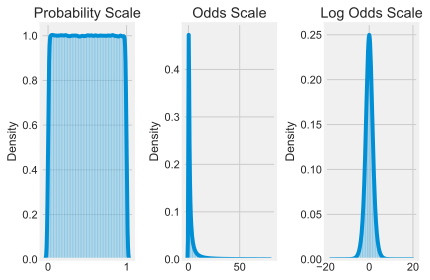

In [22]:
# draw random probabilities and convert to odds, log odds
probs = np.random.uniform(size=10000000)
odds = probs / (1 - probs)
log_odds = np.log(odds)

# plot distributions on a shared grid
fig, axs = plt.subplots(ncols=3)
sns.distplot(probs, ax=axs[0])
sns.distplot(odds[odds < 80], ax=axs[1]) # truncate extreme right tail for better visual
sns.distplot(log_odds, ax=axs[2])

axs[0].title.set_text('Probability Scale')
axs[1].title.set_text('Odds Scale')
axs[2].title.set_text('Log Odds Scale')
fig.tight_layout()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
food_cat = food.loc[:,['Doing Business As','Facility Type', 'Risk', 'Inspection Type', 'Results', 'Violations']]
food_cat = food_cat.apply(LabelEncoder().fit_transform)


In [26]:
food_cat

,Doing Business As,Facility Type,Risk,Inspection Type,Results,Violations
0,14150,375,1,58,5,161959
1,2213,375,1,80,5,103248
2,804,209,3,18,5,104482
3,15815,375,1,15,5,104813
4,24240,375,1,18,5,92675
...,...,...,...,...,...,...
222456,1487,375,1,15,5,103280
222457,7817,375,2,75,5,161959
222458,2117,209,2,21,5,161959
222459,6121,209,2,44,5,161959


In [27]:
food_num = food.loc[:,['Inspection ID', 'License #', 'Zip', 'Location']]
food_num

,Inspection ID,License #,Zip,Location
0,124275,3638.0,60630.0,"(-87.76738848299047, 41.97547236947101)"
1,114270,1980011.0,60654.0,"(-87.63495520292739, 41.8880742810662)"
2,164299,1926714.0,60643.0,"(-87.64662641289908, 41.706991857937496)"
3,98323,42194.0,60618.0,"(-87.69830277007019, 41.954083317714684)"
4,67852,1766968.0,60639.0,"(-87.76773430251839, 41.91922446447527)"
...,...,...,...,...
222456,114398,21129.0,60654.0,"(-87.62791475607904, 41.89141810118847)"
222457,150294,1516830.0,60641.0,"(-87.74710290506961, 41.95106520855843)"
222458,88257,68226.0,60659.0,"(-87.68906426569195, 41.99785368943807)"
222459,238247,2027511.0,60619.0,"(-87.61264331123509, 41.7510468251433)"


In [28]:
food_united = food_num.merge(food_cat, left_index=True, right_index=True)

In [29]:
food_united.head()

,Inspection ID,License #,Zip,Location,Doing Business As,Facility Type,Risk,Inspection Type,Results,Violations
0,124275,3638.0,60630.0,"(-87.76738848299047, 41.97547236947101)",14150,375,1,58,5,161959
1,114270,1980011.0,60654.0,"(-87.63495520292739, 41.8880742810662)",2213,375,1,80,5,103248
2,164299,1926714.0,60643.0,"(-87.64662641289908, 41.706991857937496)",804,209,3,18,5,104482
3,98323,42194.0,60618.0,"(-87.69830277007019, 41.954083317714684)",15815,375,1,15,5,104813
4,67852,1766968.0,60639.0,"(-87.76773430251839, 41.91922446447527)",24240,375,1,18,5,92675


# Not plotted to save space and be able to load it on the repo.

In [30]:
"""x = sns.pairplot(food_united)
plt.savefig("./charts/pairplot.png", bbox_inches='tight')"""
#sns.pairplot(food_united).savefig("./charts/pairplot.png", bbox_inches='tight')

'x = sns.pairplot(food_united)\nplt.savefig("./charts/pairplot.png", bbox_inches=\'tight\')'

FileNotFoundError: [Errno 2] No such file or directory: './charts/heat_map.png'

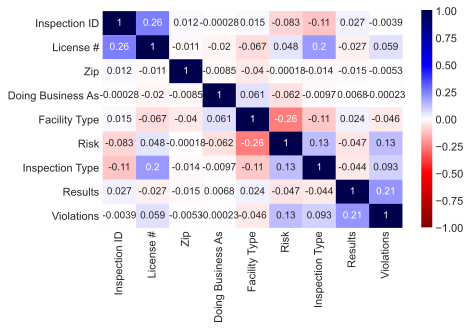

In [31]:
sns.heatmap(food_united.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)
plt.savefig("./charts/heat_map.png", bbox_inches='tight')

In [ ]:
# Define X and y
X = food_united.drop(['Results', 'Location'], axis=1)
y = food_united['Results']

print(X.shape)
print(y.shape)

In [ ]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
np.mean(y_train)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

from sklearn.tree import DecisionTreeClassifier 
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

#import xgboost as xgb
#from xgboost import XGBClassifier

In [ ]:
std_scale = StandardScaler()

X_train_scaled = std_scale.fit_transform(X_train)  # X_train : .fit_transform


# do I need to scale on Test set too?  YES!!
X_test_scaled = std_scale.transform(X_test)       # X_test: no fit, only .transform


lm3 = LogisticRegression()
lm3.fit(X_train_scaled, y_train)

y_pred_3 = lm3.predict(X_test_scaled)         # predict on scaled test


print("Model - Scaled Logisitc Rgression")

print("score on Test set:", lm3.score(X_test_scaled, y_test))     # target doesnt need to be scaled
print("score on Train set:", lm3.score(X_train_scaled, y_train))  
print("accuracy score:   ", (accuracy_score(y_test, y_pred_3))) 

#TRY

#print("Fbeta_2 score:", (fbeta_score(y_test, y_pred_3, beta = 2)))

print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_3))

print(classification_report(y_test, y_pred_3))